# Dog - Convolutional Neural Network

### Download dataset

In [1]:
#pip install --upgrade pip

In [2]:
#pip install opencv-contrib-python

In [3]:
# if you have a problem with previuos cell, you can try one of the command below

#pip install opencv-python
#pip3 install opencv-python
#pip install opencv-python==4.6.0.66

In [4]:
import cv2    # computer vision library
import shutil # copy files

from sklearn.model_selection import train_test_split
from keras.utils import plot_model

In [5]:
print(cv2.__version__)

4.9.0


#### You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.


In [6]:
import numpy as np
from tqdm import tqdm
import pandas as pd

In [7]:
df = pd.read_csv('labels.csv')
df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [9]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)

print(n, '\n',
      breed, '\n',
      n_class)

10222 
 {'scottish_deerhound', 'groenendael', 'gordon_setter', 'scotch_terrier', 'sussex_spaniel', 'border_terrier', 'pekinese', 'eskimo_dog', 'whippet', 'toy_terrier', 'bouvier_des_flandres', 'miniature_pinscher', 'border_collie', 'flat-coated_retriever', 'kerry_blue_terrier', 'miniature_schnauzer', 'pug', 'toy_poodle', 'otterhound', 'brabancon_griffon', 'irish_wolfhound', 'borzoi', 'leonberg', 'clumber', 'samoyed', 'cairn', 'german_short-haired_pointer', 'kelpie', 'bull_mastiff', 'boxer', 'bedlington_terrier', 'siberian_husky', 'standard_schnauzer', 'japanese_spaniel', 'redbone', 'irish_terrier', 'papillon', 'bloodhound', 'saint_bernard', 'welsh_springer_spaniel', 'bluetick', 'rottweiler', 'ibizan_hound', 'entlebucher', 'lakeland_terrier', 'chesapeake_bay_retriever', 'dhole', 'mexican_hairless', 'schipperke', 'old_english_sheepdog', 'curly-coated_retriever', 'affenpinscher', 'irish_water_spaniel', 'afghan_hound', 'australian_terrier', 'west_highland_white_terrier', 'irish_setter', 'm

In [10]:
class_to_num = dict(zip(breed, range(n_class)))
class_to_num

{'scottish_deerhound': 0,
 'groenendael': 1,
 'gordon_setter': 2,
 'scotch_terrier': 3,
 'sussex_spaniel': 4,
 'border_terrier': 5,
 'pekinese': 6,
 'eskimo_dog': 7,
 'whippet': 8,
 'toy_terrier': 9,
 'bouvier_des_flandres': 10,
 'miniature_pinscher': 11,
 'border_collie': 12,
 'flat-coated_retriever': 13,
 'kerry_blue_terrier': 14,
 'miniature_schnauzer': 15,
 'pug': 16,
 'toy_poodle': 17,
 'otterhound': 18,
 'brabancon_griffon': 19,
 'irish_wolfhound': 20,
 'borzoi': 21,
 'leonberg': 22,
 'clumber': 23,
 'samoyed': 24,
 'cairn': 25,
 'german_short-haired_pointer': 26,
 'kelpie': 27,
 'bull_mastiff': 28,
 'boxer': 29,
 'bedlington_terrier': 30,
 'siberian_husky': 31,
 'standard_schnauzer': 32,
 'japanese_spaniel': 33,
 'redbone': 34,
 'irish_terrier': 35,
 'papillon': 36,
 'bloodhound': 37,
 'saint_bernard': 38,
 'welsh_springer_spaniel': 39,
 'bluetick': 40,
 'rottweiler': 41,
 'ibizan_hound': 42,
 'entlebucher': 43,
 'lakeland_terrier': 44,
 'chesapeake_bay_retriever': 45,
 'dhole':

In [11]:
num_to_class = dict(zip(range(n_class), breed))
num_to_class

{0: 'scottish_deerhound',
 1: 'groenendael',
 2: 'gordon_setter',
 3: 'scotch_terrier',
 4: 'sussex_spaniel',
 5: 'border_terrier',
 6: 'pekinese',
 7: 'eskimo_dog',
 8: 'whippet',
 9: 'toy_terrier',
 10: 'bouvier_des_flandres',
 11: 'miniature_pinscher',
 12: 'border_collie',
 13: 'flat-coated_retriever',
 14: 'kerry_blue_terrier',
 15: 'miniature_schnauzer',
 16: 'pug',
 17: 'toy_poodle',
 18: 'otterhound',
 19: 'brabancon_griffon',
 20: 'irish_wolfhound',
 21: 'borzoi',
 22: 'leonberg',
 23: 'clumber',
 24: 'samoyed',
 25: 'cairn',
 26: 'german_short-haired_pointer',
 27: 'kelpie',
 28: 'bull_mastiff',
 29: 'boxer',
 30: 'bedlington_terrier',
 31: 'siberian_husky',
 32: 'standard_schnauzer',
 33: 'japanese_spaniel',
 34: 'redbone',
 35: 'irish_terrier',
 36: 'papillon',
 37: 'bloodhound',
 38: 'saint_bernard',
 39: 'welsh_springer_spaniel',
 40: 'bluetick',
 41: 'rottweiler',
 42: 'ibizan_hound',
 43: 'entlebucher',
 44: 'lakeland_terrier',
 45: 'chesapeake_bay_retriever',
 46: 'dho

In [12]:
num_to_class

{0: 'scottish_deerhound',
 1: 'groenendael',
 2: 'gordon_setter',
 3: 'scotch_terrier',
 4: 'sussex_spaniel',
 5: 'border_terrier',
 6: 'pekinese',
 7: 'eskimo_dog',
 8: 'whippet',
 9: 'toy_terrier',
 10: 'bouvier_des_flandres',
 11: 'miniature_pinscher',
 12: 'border_collie',
 13: 'flat-coated_retriever',
 14: 'kerry_blue_terrier',
 15: 'miniature_schnauzer',
 16: 'pug',
 17: 'toy_poodle',
 18: 'otterhound',
 19: 'brabancon_griffon',
 20: 'irish_wolfhound',
 21: 'borzoi',
 22: 'leonberg',
 23: 'clumber',
 24: 'samoyed',
 25: 'cairn',
 26: 'german_short-haired_pointer',
 27: 'kelpie',
 28: 'bull_mastiff',
 29: 'boxer',
 30: 'bedlington_terrier',
 31: 'siberian_husky',
 32: 'standard_schnauzer',
 33: 'japanese_spaniel',
 34: 'redbone',
 35: 'irish_terrier',
 36: 'papillon',
 37: 'bloodhound',
 38: 'saint_bernard',
 39: 'welsh_springer_spaniel',
 40: 'bluetick',
 41: 'rottweiler',
 42: 'ibizan_hound',
 43: 'entlebucher',
 44: 'lakeland_terrier',
 45: 'chesapeake_bay_retriever',
 46: 'dho

In [13]:
#width = 299
width = 64
X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)

In [14]:
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('train/%s.jpg' % df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [01:10<00:00, 144.80it/s]


In [15]:
cv2.imread?
#The function imread loads an image from the specified file and returns it.
#Функция imread загружает изображение из указанного файла и возвращает его с указанными размерами.

Docstring:
imread(filename[, flags]) -> retval
.   @brief Loads an image from a file.
.   
.   @anchor imread
.   
.   The function imread loads an image from the specified file and returns it. If the image cannot be
.   read (because of missing file, improper permissions, unsupported or invalid format), the function
.   returns an empty matrix ( Mat::data==NULL ).
.   
.   Currently, the following file formats are supported:
.   
.   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
.   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
.   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
.   -   Portable Network Graphics - \*.png (see the *Note* section)
.   -   WebP - \*.webp (see the *Note* section)
.   -   AVIF - \*.avif (see the *Note* section)
.   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
.   -   PFM files - \*.pfm (see the *Note* section)
.   -   Sun rasters - \*.sr, \*.ras (always supported)
.   -   TIFF file

In [16]:
print(X.shape)
print(y.shape)

(10222, 64, 64, 3)
(10222, 120)


## Create a dataset of only the 10 most common dog breeds


In [17]:
df['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [18]:
# the 10 most common dog breeds

z = df['breed'].value_counts()[0:10]
z

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: count, dtype: int64

In [19]:
# The total number of images of the 10 most common dog breeds

n_10 = z.sum()
n_10

1141

In [20]:
num = df['breed'].value_counts().index
num

Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'otterhound', 'german_shepherd', 'walker_hound', 'tibetan_mastiff',
       'giant_schnauzer', 'golden_retriever', 'brabancon_griffon', 'komondor',
       'eskimo_dog', 'briard'],
      dtype='object', name='breed', length=120)

In [21]:
num_10 = num[0:10]
num_10 = pd.DataFrame(num_10)
num_10

,breed
0,scottish_deerhound
1,maltese_dog
2,afghan_hound
3,entlebucher
4,bernese_mountain_dog
5,shih-tzu
6,great_pyrenees
7,pomeranian
8,basenji
9,samoyed


In [22]:
breed_10 = set(num_10['breed'])
breed_10

{'afghan_hound',
 'basenji',
 'bernese_mountain_dog',
 'entlebucher',
 'great_pyrenees',
 'maltese_dog',
 'pomeranian',
 'samoyed',
 'scottish_deerhound',
 'shih-tzu'}

In [23]:
class_to_num_10 = dict(zip(breed_10, range(10)))
class_to_num_10

{'pomeranian': 0,
 'scottish_deerhound': 1,
 'entlebucher': 2,
 'basenji': 3,
 'samoyed': 4,
 'great_pyrenees': 5,
 'bernese_mountain_dog': 6,
 'afghan_hound': 7,
 'shih-tzu': 8,
 'maltese_dog': 9}

In [24]:
num_to_class_10 = dict(zip(range(10), breed_10))
num_to_class_10

{0: 'pomeranian',
 1: 'scottish_deerhound',
 2: 'entlebucher',
 3: 'basenji',
 4: 'samoyed',
 5: 'great_pyrenees',
 6: 'bernese_mountain_dog',
 7: 'afghan_hound',
 8: 'shih-tzu',
 9: 'maltese_dog'}

In [25]:
X_10 = np.zeros((n_10, width, width, 3), dtype=np.uint8)
y_10 = np.zeros((n_10, 10), dtype=np.uint8)

In [26]:
k=0
for i in tqdm(range(n)):
    for j in range(10):
        if (df.iloc[i][1] == num_10['breed'][j]):
            X_10[k] = cv2.resize(cv2.imread('./train/%s.jpg' % df['id'][i]), (width, width))
            # shutil.move("./train/%s.jpg", "train_10/%s.jpg")
            y_10[k][class_to_num_10[num_10['breed'][j]]] = 1
            k +=1

  0%|                                                                                        | 0/10222 [00:00<?, ?it/s]C:\Users\sasen\AppData\Local\Temp\ipykernel_18264\322966137.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df.iloc[i][1] == num_10['breed'][j]):
100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [00:11<00:00, 905.20it/s]


In [27]:
print(X_10.shape)
print(y_10.shape)

(1141, 64, 64, 3)
(1141, 10)


In [28]:
y_10[1140]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

### Data set visualisation

In [29]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

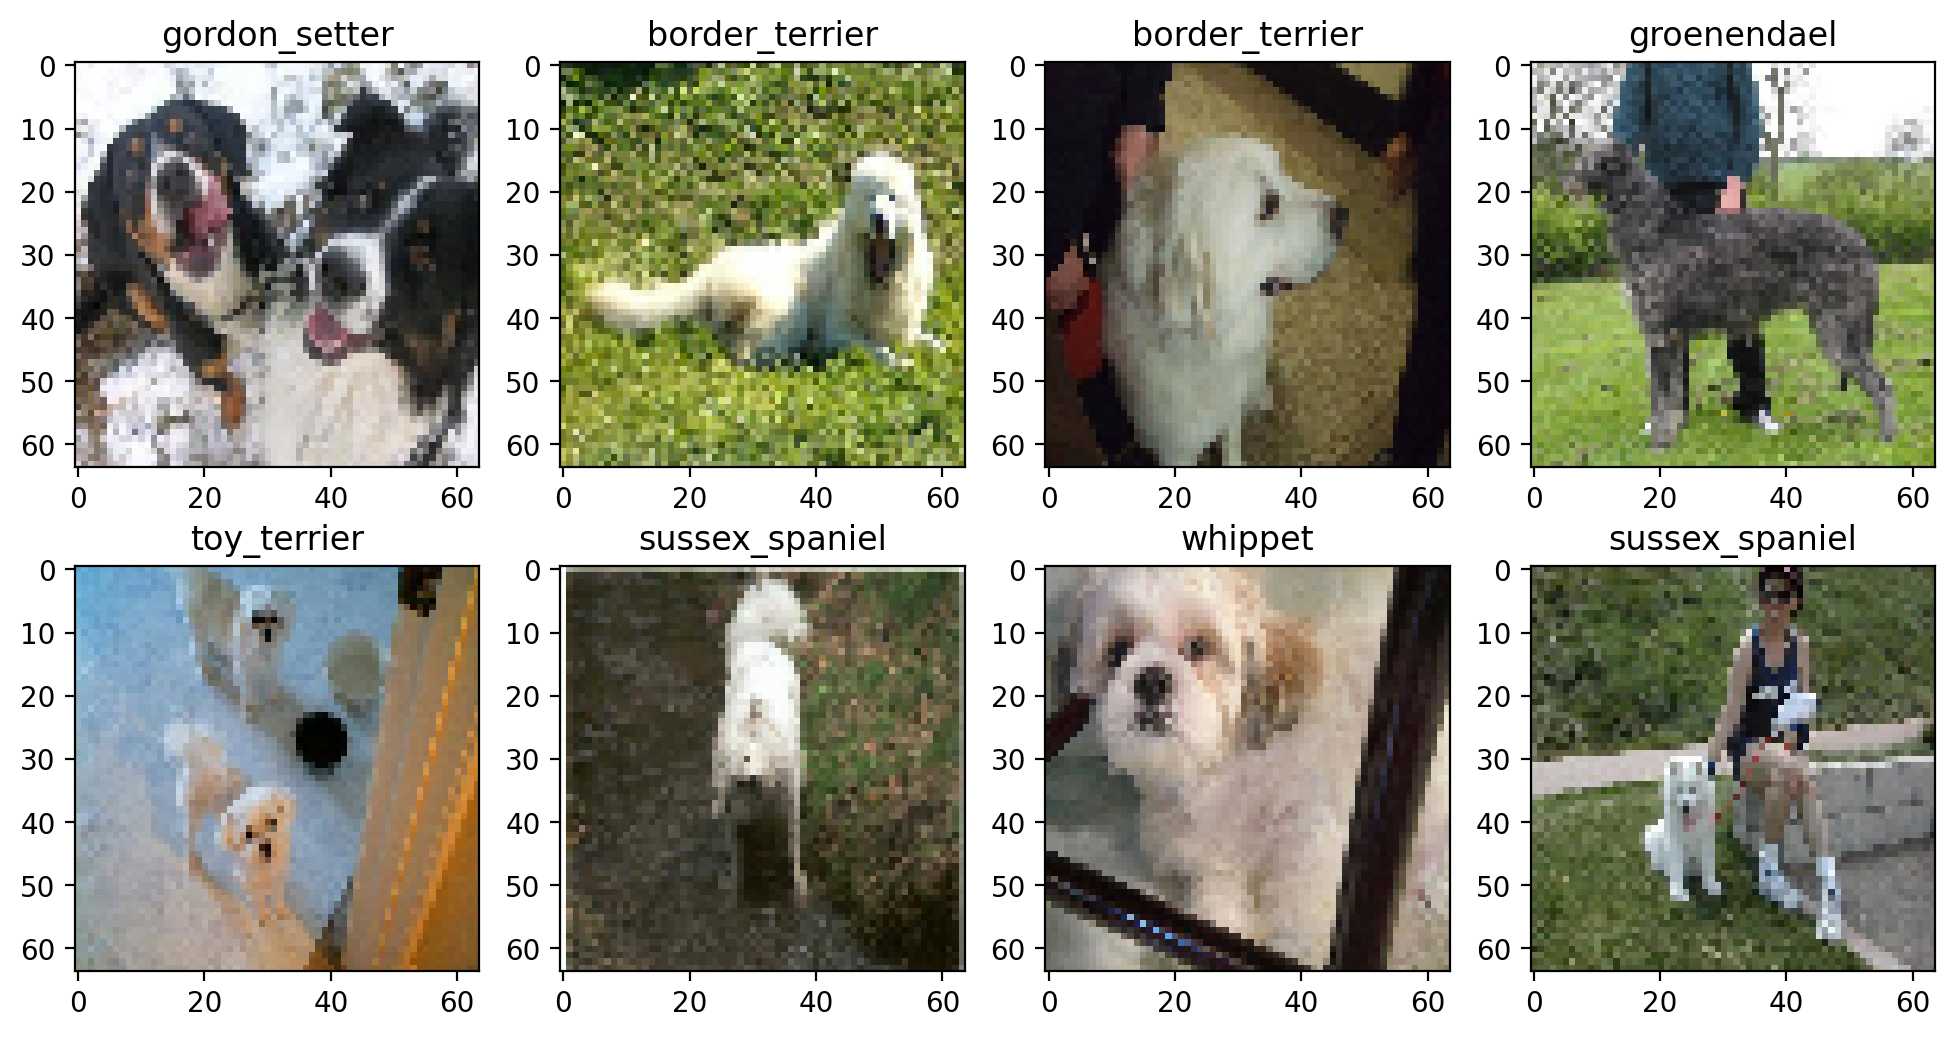

In [30]:
plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n_10-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X_10[random_index][:,:,::-1])
    plt.title(num_to_class[y_10[random_index].argmax()])

In [31]:
X_10.shape

(1141, 64, 64, 3)

In [32]:
y_10.shape

(1141, 10)

In [33]:
# Your code to split data into X_train, X_test, y_train, y_test using 'train_test_split'
# choose the size of the test part

X_train, X_test, y_train, y_test =  train_test_split(X_10, y_10, test_size=0.2)

In [34]:
# Your code to display the shape of train and test sets

print(X_train.shape,'\n',X_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(912, 64, 64, 3) 
 (229, 64, 64, 3) 
 (912, 10) 
 (229, 10)


## Сreating CNN

In [35]:
import tensorflow as tf

print(tf.__version__)

2.10.1


In [36]:
from tensorflow import keras

import random
np.random.seed(42)

In [37]:
# your code to create a convolutional neural network model as shown below in model.summary()
# use layer Dropout(0.25)
# use activation='relu' in convolutional layers
# use Flatten() as 2D to 1D vector conversion layer

model = keras.Sequential([        # neural network where layers follow one another

    # First Convolutional layer
    # Incoming data: a picture of 64 * 64 pixels and 3 colours
    keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3),
                        activation='relu'),

    # Second Convolutional layer
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Pooling layer
    keras.layers.MaxPool2D(),
    # Dropout layer (avoid overfitting)
    keras.layers.Dropout(0.5),
    
    # Third Convolutional layer
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    # Fourth Convolutional layer
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    # Pooling layer
    keras.layers.MaxPool2D(),
    # Dropout layer (avoid overfitting)
     keras.layers.Dropout(0.5),
    # 2D to 1D vector conversion layer
    keras.layers.Flatten(),
    # Fully connected layer for classification
    keras.layers.Dense(512, activation='relu'),
    
    # Dropout layer (avoid overfitting)
    keras.layers.Dropout(0.25),
    # Output Fully Connected Layer
    keras.layers.Dense(10, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                        

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                        

In [39]:
# compilation

model.compile(loss='categorical_crossentropy', optimizer='adam',
            metrics=['accuracy'])

In [47]:
# your code to train the neural network module
# use epochs = 50  

# history = model.fit(X_train, y_train, epochs=400, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)], validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size = 128, validation_data=(X_test, y_test), verbose=1, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)])

Epoch 1/50
8/8 [==============================] - 1s 55ms/step - loss: 2.1880 - accuracy: 0.1853 - val_loss: 2.4178 - val_accuracy: 0.1878
Epoch 2/50
8/8 [==============================] - 0s 47ms/step - loss: 2.1422 - accuracy: 0.2050 - val_loss: 2.3945 - val_accuracy: 0.1441
Epoch 3/50
8/8 [==============================] - 0s 47ms/step - loss: 2.1267 - accuracy: 0.2083 - val_loss: 2.4337 - val_accuracy: 0.1747
Epoch 4/50
8/8 [==============================] - 0s 49ms/step - loss: 2.1070 - accuracy: 0.2182 - val_loss: 2.5191 - val_accuracy: 0.1747
Epoch 5/50
8/8 [==============================] - 0s 50ms/step - loss: 2.0907 - accuracy: 0.2314 - val_loss: 2.3803 - val_accuracy: 0.1441
Epoch 6/50
8/8 [==============================] - 0s 46ms/step - loss: 2.0749 - accuracy: 0.2270 - val_loss: 2.6699 - val_accuracy: 0.1572
Epoch 7/50
8/8 [==============================] - 0s 48ms/step - loss: 2.0819 - accuracy: 0.2401 - val_loss: 2.4241 - val_accuracy: 0.1572
Epoch 8/50
8/8 [===========

In [48]:
# evaluation of the result on the train and test data

scores_train = model.evaluate(X_train, y_train, verbose=1)
scores_test = model.evaluate(X_test, y_test, verbose=1)

8/8 [==============================] - 0s 7ms/step - loss: 2.5077 - accuracy: 0.0917


In [49]:
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Test  Accuracy: %.2f%%" % (scores_test[1]*100))

Train Accuracy: 35.42%
Test  Accuracy: 9.17%


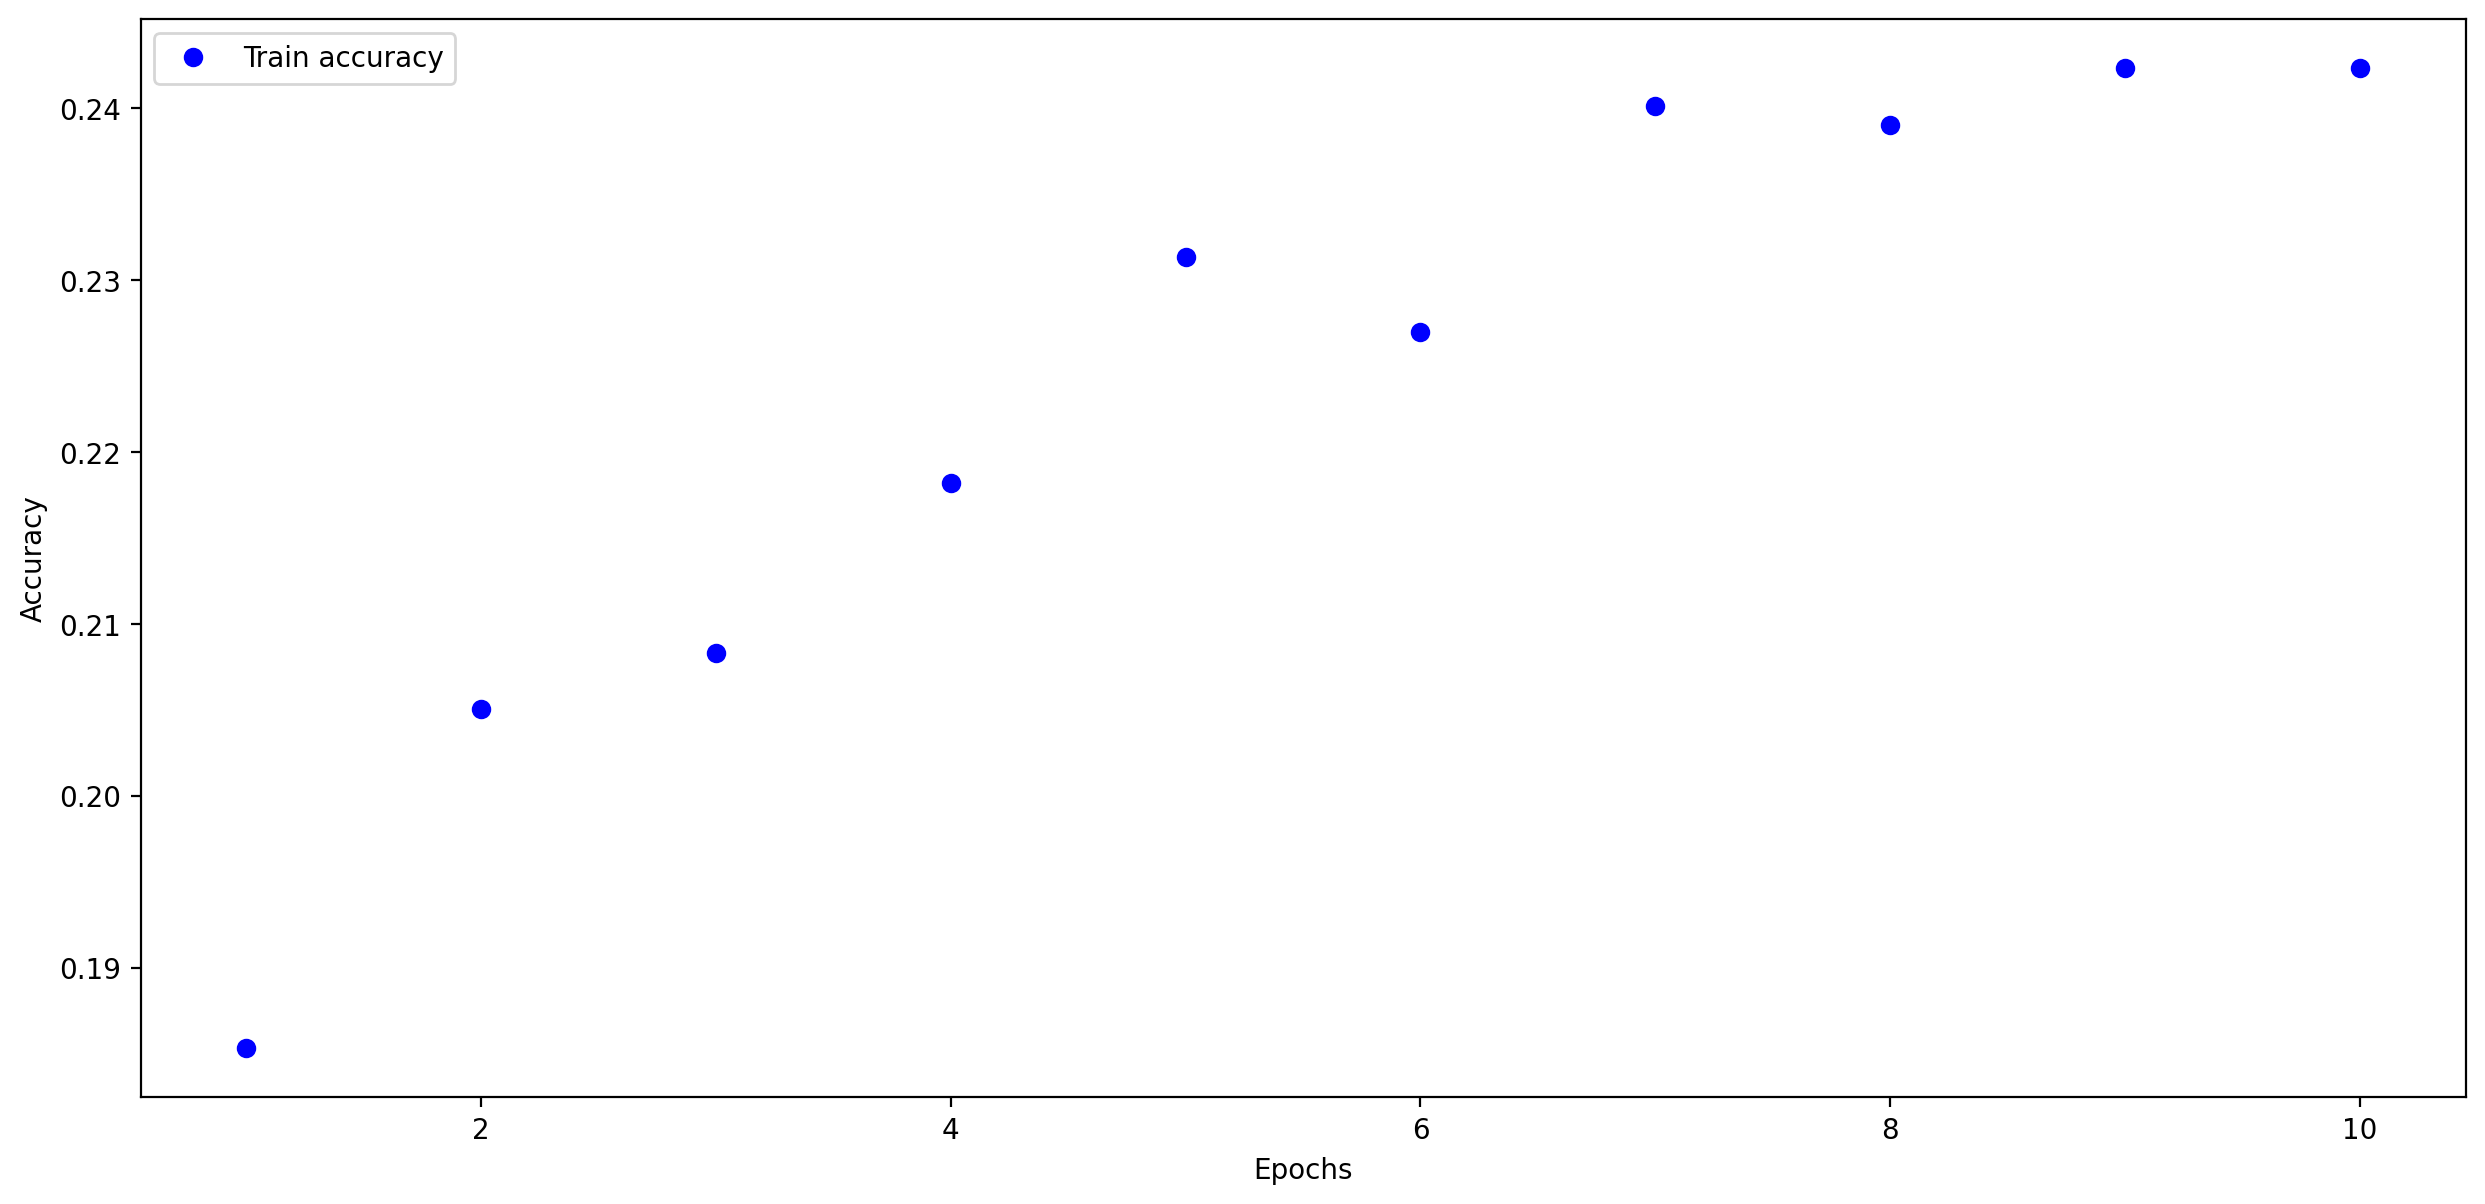

In [50]:
# printing the results

history_dict = history.history

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Train accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Saving the trained neural network in files

In [51]:
model_json = model.to_json() # special format for model

json_file = open("Dog_CNN.json", "w")
json_file.write(model_json)
json_file.close()

In [52]:
# save the weights of the trained network in format HDF5

model.save_weights("Dog_CNN.h5")

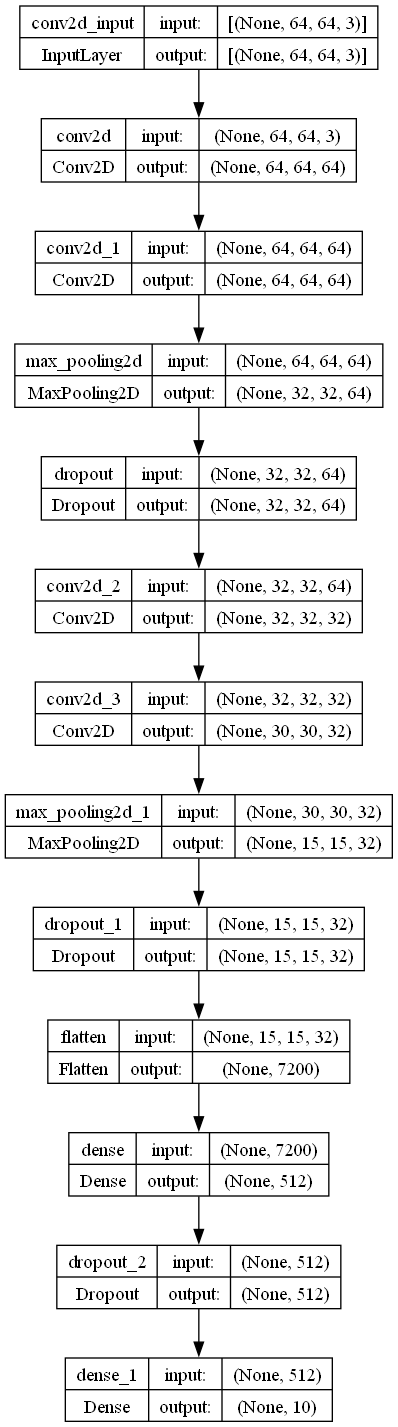

In [53]:
plot_model(model, show_shapes=True, show_layer_names=True)